# Inaugural Project

In [1]:
#from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HSMC123 import HouseholdSpecializationModelClass as HSMC


# Question 1

In [2]:
model = HSMC()

# Now we define two lists, which contain the values of alpha and sigma that will be used in the calculations.
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]
# Now we make ratios list
ratios = []



# Now we loop over the alpha and sigma values

for alpha in alpha_vals:
    for sigma in sigma_vals:
        # Here we set alpha and sigma in the model
        model.par.alpha = alpha
        model.par.sigma = sigma
        # Now we solve the discrete optimization problem
        opt = model.solve_discrete(do_print=False)
        # And now calculate and store the ratio
        ratios.append(opt.HF / opt.HM)
# Here we convert ratios into numpy array 
ratio_grid = np.array(ratios).reshape(len(alpha_vals), len(sigma_vals))

# Now we print the ratios for each alpha and sigma combination
for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        print(f"alpha={alpha}, sigma={sigma}: HF/HM = {ratio_grid[i, j]:.4f}")

# Question 2: Plot log HF/HM against log wF/wM for wF in [0.8, 0.9, 1.0, 1.1, 1.2]
wF_vals = [0.8, 0.9, 1.0, 1.1, 1.2]
ratio_vals = []

for wF in wF_vals:
    model.par.wF = wF
    
    # Npw we solve the optimization problem again
    opt = model.solve(do_print=False)
    ratio = opt.HF / opt.HM
    # And now we calculate and store the logarithmic ratio
    ratio_vals.append(np.log(ratio))
    
# Here we create a array with values and corresponding ratio
wF_ratio_grid = np.array(list(zip(wF_vals, ratio_vals)))



/Users/andersrosman/Desktop/til aflv/projects-2023-andy-bank-1/inauguralproject/HSMC123.py:48: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1 - par.alpha) * HM**((par.sigma - 1) / par.sigma) +
/Users/andersrosman/Desktop/til aflv/projects-2023-andy-bank-1/inauguralproject/HSMC123.py:48: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1 - par.alpha) * HM**((par.sigma - 1) / par.sigma) +
/Users/andersrosman/Desktop/til aflv/projects-2023-andy-bank-1/inauguralproject/HSMC123.py:49: RuntimeWarning: divide by zero encountered in reciprocal
  par.alpha * HF**((par.sigma - 1) / par.sigma)**(par.sigma / (par.sigma - 1)))
/Users/andersrosman/Desktop/til aflv/projects-2023-andy-bank-1/inauguralproject/HSMC123.py:49: RuntimeWarning: invalid value encountered in reciprocal
  par.alpha * HF**((par.sigma - 1) / par.sigma)**(par.sigma / (par.sigma - 1)))
/Users/andersrosman/Desktop/til aflv/projects-2023-andy-bank-1/inauguralproject/HSMC123.py:52: RuntimeWarning: i

alpha=0.25, sigma=0.5: HF/HM = nan
alpha=0.25, sigma=1.0: HF/HM = 0.3077
alpha=0.25, sigma=1.5: HF/HM = 0.1429
alpha=0.5, sigma=0.5: HF/HM = nan
alpha=0.5, sigma=1.0: HF/HM = 1.0000
alpha=0.5, sigma=1.5: HF/HM = 0.1667
alpha=0.75, sigma=0.5: HF/HM = nan
alpha=0.75, sigma=1.0: HF/HM = 3.2500
alpha=0.75, sigma=1.5: HF/HM = 0.3333


Q1 conclusion: we see that men and women do equally much home production when the two genders are equally productive (alpha=0.5) and the substitution coefficient is sigma=1.

# Question 2

LM = 6.0000
HM = 4.0000
LF = 3.0000
HF = 5.0000
LM = 5.0000
HM = 4.5000
LF = 4.0000
HF = 4.5000
LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
LM = 4.0000
HM = 4.5000
LF = 5.0000
HF = 4.0000
LM = 3.0000
HM = 5.0000
LF = 5.5000
HF = 4.0000


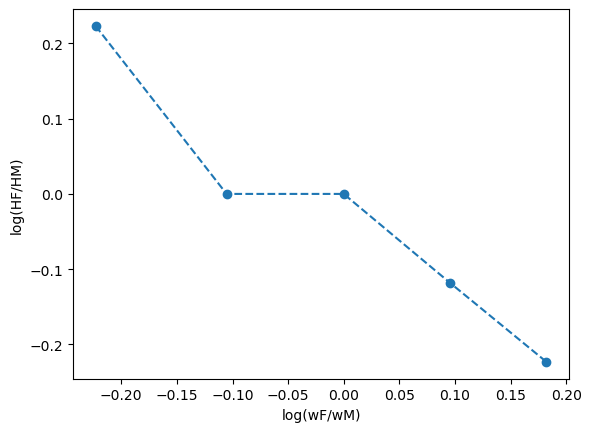

In [3]:


model = HSMC()

# Here we set wF values
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# Now we solve for each wF value
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete(do_print=True)
    model.sol.LM_vec[i] = opt.LM
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.HF_vec[i] = opt.HF

# Now we calculate log ratios
log_HF_HM1 = np.log(model.sol.HF_vec / model.sol.HM_vec)
log_wF_wM1 = np.log(model.par.wF_vec / model.par.wM)

# And lastly plot log ratios against log wF/wM
plt.plot(log_wF_wM1, log_HF_HM1, 'o', linestyle ='--')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()



Q2 conclusion: Aa women's wages decreases relative to  men's wages, we see an increase in women's home production. Men and women work equally much in home production when log(w_F/w_h) is in the interval [-0.1;0]. That is, they spend an equal amount of time in home production when there is no wage disparity (log(w_F/w_h=0), which seems intuitive as no gender has a comparative advantage. However, time spend in home production doesnt change as women's relative wage decreases slightly down to (log(w_F/w_h= -0.10). This property seems odd and unintuitive. 

# Question 3

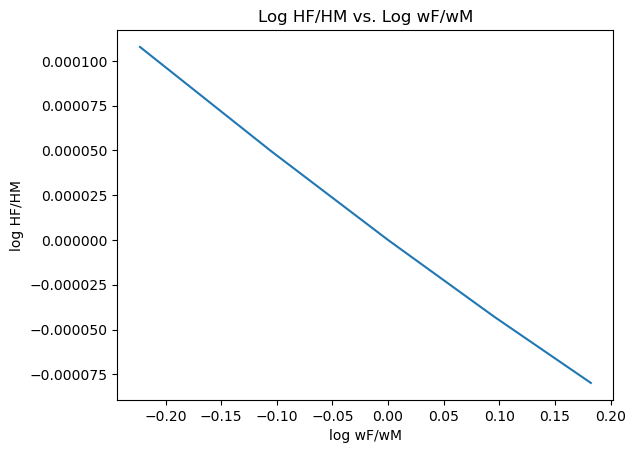

In [4]:
model = HSMC()

# Here we define wF values
wF_vals = [0.8, 0.9, 1.0, 1.1, 1.2]

# Make a ratio list 
ratio_vals = []


# We loop over the wF values
for wF in wF_vals:
    model.par.wF = wF
    # Now we solve the optimization problem again
    opt = model.solve(do_print=False)
    # Now we calculate the ratio and store its logarithm
    ratio = opt.HF / opt.HM
    ratio_vals.append(np.log(ratio))


# Again we create a numpy  with wF values and corresponding ratios
wF_ratio_grid = np.array(list(zip(wF_vals, ratio_vals)))

# Lastly we plot the results
plt.plot(np.log(wF_ratio_grid[:, 0]), wF_ratio_grid[:, 1])
plt.xlabel("log wF/wM")
plt.ylabel("log HF/HM")
plt.title("Log HF/HM vs. Log wF/wM")
plt.show()


Q3 conclusion: The graph confirms the economic intuition observed in Question 2, namely that women's participation in home production decreases as their wages increase relative to men's. However, in this continuous-time example, there is no occurrence where men and women allocate an equal amount of time to home production, even in the presence of a wage discrepancy. This result aligns more intuitively with our understanding of the division of labor in households.

# Question 4

/var/folders/g0/x_8vrrh13_nbs6zzyv_w58qr0000gn/T/ipykernel_57118/1228825439.py:6: RuntimeWarning: invalid value encountered in true_divide
  log_timer= np.log(model.sol.HF_vec/model.sol.HM_vec)


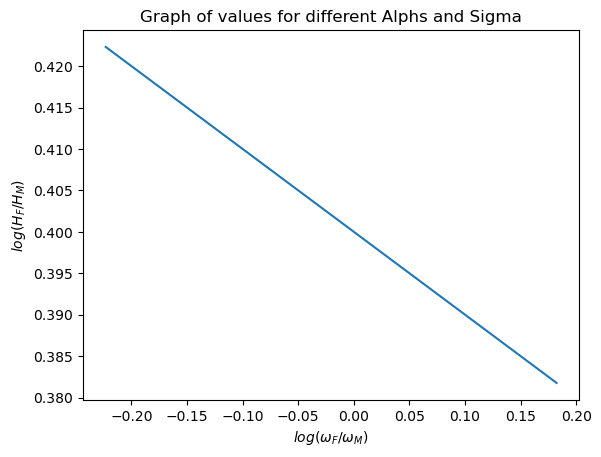

In [5]:
# Here we estimate the model

model.estimate()

# Now we calculate the log of HF_vec divided by HM_vec
log_timer= np.log(model.sol.HF_vec/model.sol.HM_vec)

# We create a figure

fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)

# Then we make a scatter plot of log wF/wM and log HF/HM

ax.scatter(np.log(model.par.wF_vec),log_timer)

# Then we make the target line

ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec))

# Lastly we create the labels and title

ax.set_title('Graph of values for different Alphs and Sigma')
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$')


# Now we display the plot
plt.show()


Q4 conclusion: 
Alpha -> 1 suggests that women are more productive than men in the household. Sigma-> 1  implies an increase in the elasticity of substitution, and Siminski and Yetsenga finds sigma = 0.095 which suggests parity between home production work for the two genders first occurs when women make 109 times more than men. These findings suggest that women tend to work more in house production than men, regardless of the relative wage differences. The line slope, Beta_1,  suggests that women’s home production decreases as their wage increases relative to men’s.
Additionally, as the relative wage between women and men increases (i.e. log(W_f /W_m)-> infinity), we see, as in the previous tasks, that women allocate less time to home production. However, in this case, even when women make more than men, they still spend more time in home production for all relative wage diffeences exemplified in the graph.  

# Question 5

/var/folders/g0/x_8vrrh13_nbs6zzyv_w58qr0000gn/T/ipykernel_57118/2440271123.py:42: RuntimeWarning: invalid value encountered in double_scalars
  log_HF_HM.append(np.log(HF / HM))
/var/folders/g0/x_8vrrh13_nbs6zzyv_w58qr0000gn/T/ipykernel_57118/2440271123.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  log_HF_HM.append(np.log(HF / HM))
/var/folders/g0/x_8vrrh13_nbs6zzyv_w58qr0000gn/T/ipykernel_57118/2440271123.py:42: RuntimeWarning: divide by zero encountered in log
  log_HF_HM.append(np.log(HF / HM))


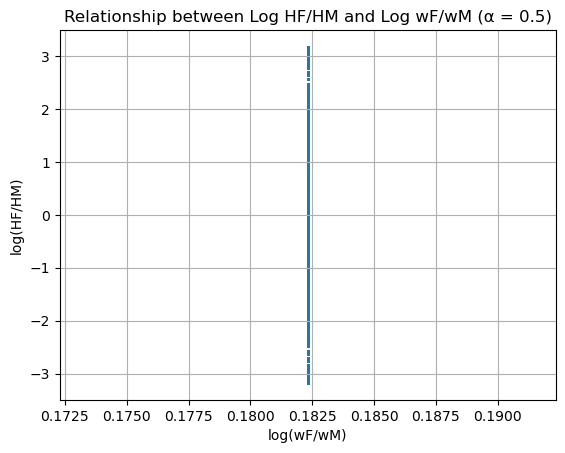

In [6]:

def calc_utility(LM, HM, LF, HF, par):
    """ calculate utility """

    # a. consumption of market goods
    C = par.wM * LM + par.wF * LF

    # b. home production (with α = 0.5)
    H = np.minimum(HM, HF)

    # c. total consumption utility
    Q = C ** par.omega * H ** (1 - par.omega)
    utility = np.fmax(Q, 1e-8) ** (1 - par.rho) / (1 - par.rho)

    # d. disutility of work
    epsilon_ = 1 + 1 / par.epsilon
    TM = LM + HM
    TF = LF + HF
    disutility = par.nu * (TM ** epsilon_ / epsilon_ + TF ** epsilon_ / epsilon_)

    return utility - disutility


# Here we set the values of alpha and sigma in the model
model.par.alpha = 0.5
model.par.sigma = 1.0

# Here we set the range and step sizes for LM, HM, LF, and HF 
LM_values = np.linspace(0, 24, 25)
HM_values = np.linspace(0, 24, 25)
LF_values = np.linspace(0, 24, 25)
HF_values = np.linspace(0, 24, 25)

# Here we calculate  the utility for each combination of LM, HM, LF, and HF
log_HF_HM = []
log_wF_wM = []

for LM in LM_values:
    for HM in HM_values:
        for LF in LF_values:
            for HF in HF_values:
                utility = calc_utility(LM, HM, LF, HF, model.par)
                log_HF_HM.append(np.log(HF / HM))
                log_wF_wM.append(np.log(model.par.wF / model.par.wM))

# Lastly we plot the results
plt.scatter(log_wF_wM, log_HF_HM, s=1)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.title('Relationship between Log HF/HM and Log wF/wM (α = 0.5)')
plt.grid(True)
plt.show()


Q5 conclusion: The plot of log(H_F/H_M) against log(w_F/w_M) provides insights into the relationship between the relative wages of females and males (log(wF/wM)) and the division of home production activities (log(HF/HM)). By examining the slope of the line, we can understand how changes in relative wages affect the allocation of time between men and women in home production.

The observed vertical slope of the line is not intuitive from an economic standpoint. In theory, with alpha=0.5, which implies equal productivity between men and women in home production, we would expect to see a negative slope. This means that as the relative wage of females (w_F/w_M) increases, the ratio of home production by females to males (HF/HM) should decrease. This implies that as women's wages become relatively higher, they tend to allocate more time to work compared to home production.